In [1]:
import pandas as pd 

In [2]:
BHNames= ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black',
         'lstat','medv'] 

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data' 

In [4]:
dataset = pd.read_csv(url,delim_whitespace=True,names=BHNames) 

In [5]:
dataset.head() 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [23]:
#dataset.summary

#### To Scale value 0 to 1 apply preprocessing in Mms

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
dataset = scaler.fit_transform(dataset) 
print(dataset) 
dataset = pd.DataFrame(data=dataset,columns=BHNames) 

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 4.22222222e-01]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 3.68888889e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.89737254e-01
  6.34657837e-02 6.60000000e-01]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 4.20000000e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.91300620e-01
  1.31070640e-01 3.77777778e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 1.53333333e-01]]


#### Divide the data into dependent and inependent variable

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
x = dataset.drop(labels='medv',axis=1) 
print(x)
print("\n") 
print("Shape of x is = {}".format(x.shape)) 

         crim    zn     indus  chas       nox        rm       age       dis  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.802266  0.125072   

          rad       tax   ptratio     black     lst

In [9]:
y = dataset['medv'] 

print(y)
print("\n")
print('y shape is = {}'.format(y.shape)) 

0      0.422222
1      0.368889
2      0.660000
3      0.631111
4      0.693333
         ...   
501    0.386667
502    0.346667
503    0.420000
504    0.377778
505    0.153333
Name: medv, Length: 506, dtype: float64


y shape is = (506,)


Now we scale our data and use lesso regression on that data

In [10]:
from sklearn import linear_model 

In [11]:
names= dataset.drop('medv',axis=1).columns
print(names) 

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')


In [12]:
lasso = linear_model.Lasso(alpha=0.2) 

In [16]:
print('lasso is = {}'.format(lasso))

lasso is = Lasso(alpha=0.2)


In [13]:
lasso_coef = lasso.fit(x,y).coef_ 

In [17]:
print('lasso_coef is = {}'.format(lasso_coef)) 

lasso_coef is = [-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]


In [14]:
import matplotlib.pyplot as plt 

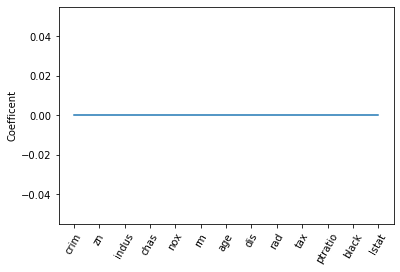

In [24]:
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficent') 
plt.show() 

#### For Ridge

In [18]:
from sklearn.preprocessing import StandardScaler 

In [20]:
scaler = StandardScaler() 
x_std = scaler.fit_transform(x)

# Call to Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.2)
model = ridge.fit(x_std,y).coef_ 
model 

array([-0.02058802,  0.02396651,  0.00302386,  0.01516523, -0.04558018,
        0.05946605,  0.00040399, -0.06885924,  0.05883896, -0.04584857,
       -0.04575427,  0.01887077, -0.08313364])